In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import rc,ticker
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from glob import glob

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib import rc

rc('text', usetex=True)
rc('font', family="serif")
rc('axes', labelsize=12)
rc('font', size=12)
rc('legend', fontsize=10)
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
plt.rcParams['xtick.direction']="in"  # X ticks
plt.rcParams['xtick.top']=True  # X ticks
plt.rcParams['ytick.direction']="in"  # X ticks
plt.rcParams['ytick.right']=True  # X ticks

In [2]:
# Enable inline plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
save_plots = True
plots_dir = '../0vev_datarelease_plots'

# Fig. 1

/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


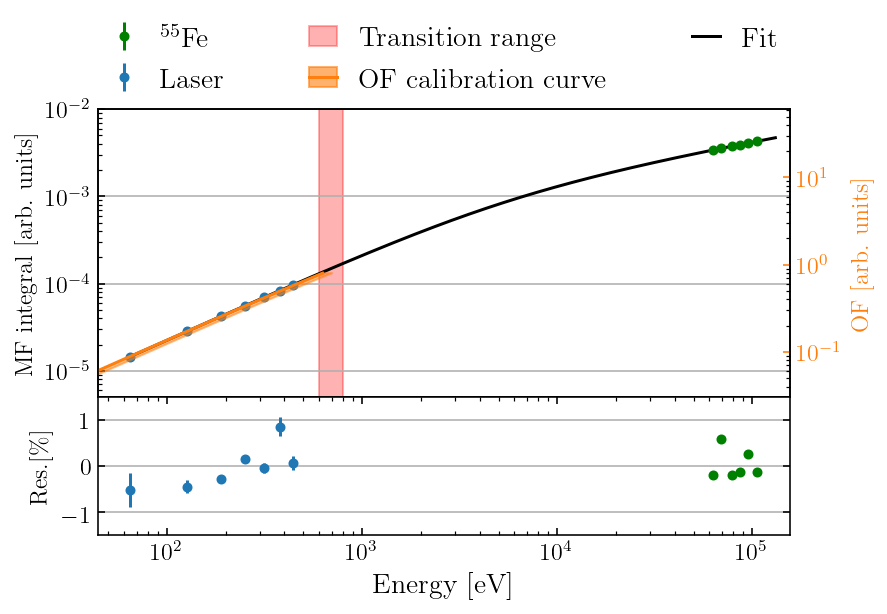

In [9]:
MF_calib_points = np.loadtxt("data_files/fig1/MF_calib_points.txt",delimiter=",")
MF_calib_coeff = np.loadtxt("data_files/fig1/MF_calib_curve.txt",delimiter=",")
OF_calib_coeff = np.loadtxt("data_files/fig1/OF_calib_curve.txt",delimiter=",")


MF_calib_energy,MF_calib_MF,MF_calib_unc,MF_calib_res = np.transpose(MF_calib_points)
f_MF = np.poly1d(MF_calib_coeff)
f_OF=lambda x: OF_calib_coeff[0]*x*(1+OF_calib_coeff[1]*x)



fig1 = figure(1)

################### 
# Frame 1
frame1=fig1.add_axes((.12,.38,.8,.5))
x_axis = frame1.axes.get_xaxis()
x_axis.set_visible(False)

xx = np.linspace(MF_calib_MF.min(),MF_calib_MF.max()*1.1,400)
errorbar(MF_calib_energy[:7],MF_calib_MF[:7],yerr=MF_calib_unc[:7],fmt="o",markersize=4,label="Laser")
errorbar(MF_calib_energy[7:],MF_calib_MF[7:],yerr=MF_calib_unc[7:],fmt="o",markersize=4,color="g",label="$^{55}$Fe")
plot(f_MF(xx), xx,label = 'Fit',color="k")
axvspan(600,800,color="r",alpha=0.3,label="Transition range")

ylabel('MF integral [arb. units]')
xscale("log")
yscale("log")
xlim(min(MF_calib_energy)-20,max(MF_calib_energy)+50000)
ylim(5e-6,1e-2)
grid()

ax0=gca()
handles, labels = ax0.get_legend_handles_labels()
handles=handles[::-1]
labels=labels[::-1]

################### 
# Frame 1 right
ax_twin1 = gca().twinx()
OF_range=np.linspace(0,0.16*5,100)
ax_twin1.plot(f_OF(OF_range),OF_range,color="C1",label="0V")
ax_twin1.fill_betweenx(OF_range, f_OF(OF_range),f_OF(OF_range*1.11) ,label = '0V uncertainty',color="C1",alpha=0.5)

c=0.33
ax_twin1.set_ylim(0.01/c,20/c)
ax_twin1.set_xscale("log")
ax_twin1.set_yscale("log")
ax_twin1.set_ylabel("OF [arb. units]", color="C1")
ax_twin1.tick_params(axis='y', colors="C1")
handles2, labels2 = ax_twin1.get_legend_handles_labels()

sca(ax0)
C1_patch = mpatches.Patch(color='C1', alpha=0.2)
legend([*handles[:3],(*handles2,C1_patch),handles[-1]],[*labels[:3],"OF calibration curve",labels[-1]],ncol=3, columnspacing = 0.5,handlelength=1.,bbox_to_anchor=(0., 1.02, 1., .102),
    mode="expand", borderaxespad=0.,prop={'size': 14}, loc='lower left', frameon=False)

################### 
# Frame 2
frame2=fig1.add_axes((.12,.14,.8,.24))        
errorbar(MF_calib_energy[:7],MF_calib_res[:7],yerr=(MF_calib_unc/MF_calib_MF*100)[:7],fmt="o",markersize=4)
errorbar(MF_calib_energy[7:],MF_calib_res[7:],yerr=(MF_calib_unc/MF_calib_MF*100)[7:],fmt="o",color="g",markersize=4)
ylabel('Res.[\%]')
xlabel("Energy [eV]", fontsize=14)
xlim(min(MF_calib_energy)-20,max(MF_calib_energy)+50000)
ylim(-1.5,1.5)
xscale("log")
grid(axis='y')
tight_layout()

if save_plots:
    savefig(f"{plots_dir}/fig1.pdf", bbox_inches="tight")

#show()


# Fig. 3

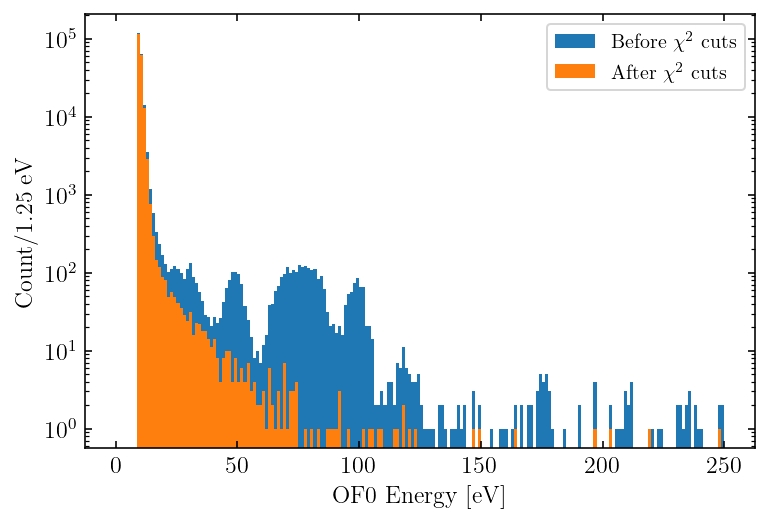

In [10]:
spectrum_before_cuts = np.loadtxt('./limit_data/spectrum_before_cuts.tsv')
spectrum = np.loadtxt('./limit_data/spectrum.tsv')

bins = np.linspace(0, 250, 201)
plt.hist(spectrum_before_cuts, bins=bins, log=True, label=r'Before $\chi^2$ cuts')
plt.hist(spectrum, bins=bins, log=True, label=r'After $\chi^2$ cuts')
plt.xlabel('OF0 Energy [eV]')
plt.ylabel('Count/1.25 eV')
plt.legend()

if save_plots:
    savefig(f"{plots_dir}/spectrum.pdf", bbox_inches="tight")
    
plt.show()

# Fig. 4

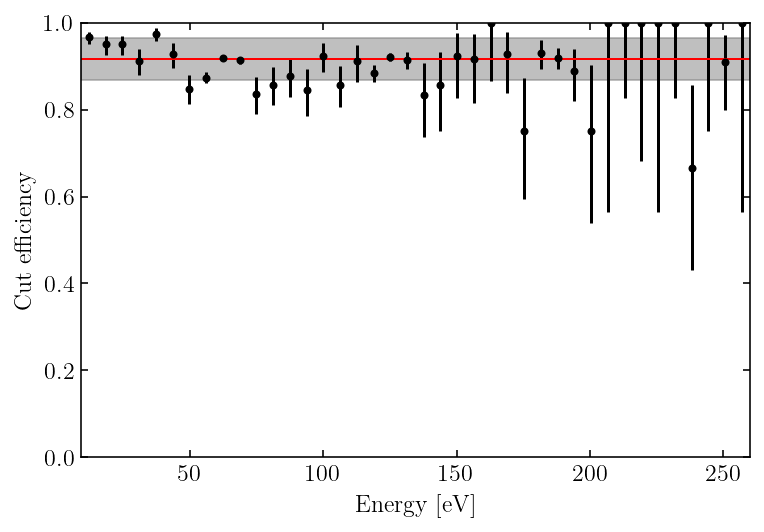

In [11]:
[energy, efficiency, efficiency_unc_l, efficiency_unc_h, fit, fit_unc] = np.loadtxt("limit_data/efficiency.txt",delimiter=",").T


fig,ax = subplots(figsize=(6,4))
errorbar(energy, efficiency, yerr=np.array([efficiency_unc_l,efficiency_unc_h]), fmt='.', color='k')
    
# fit=np.repeat(eff_val,len(energy))
# fit_unc=np.repeat(eff_val-ymin[0],len(energy))

# ax.tick_params(labelsize=14,direction='in',which='both')
# ax.yaxis.set_ticks_position('both')
# ax.xaxis.set_ticks_position('both') 

ax.set_xlim(9,260)
ax.set_ylim(0,1.0)
ax.axhspan(fit[0]-fit_unc[0],fit[0]+fit_unc[0], alpha=0.5, color='gray')
ax.axhline(y=fit[0], color='r', lw=1)

ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Cut efficiency')

if save_plots:
    savefig(f"{plots_dir}/fig4.pdf", bbox_inches="tight")

# Fig. 5

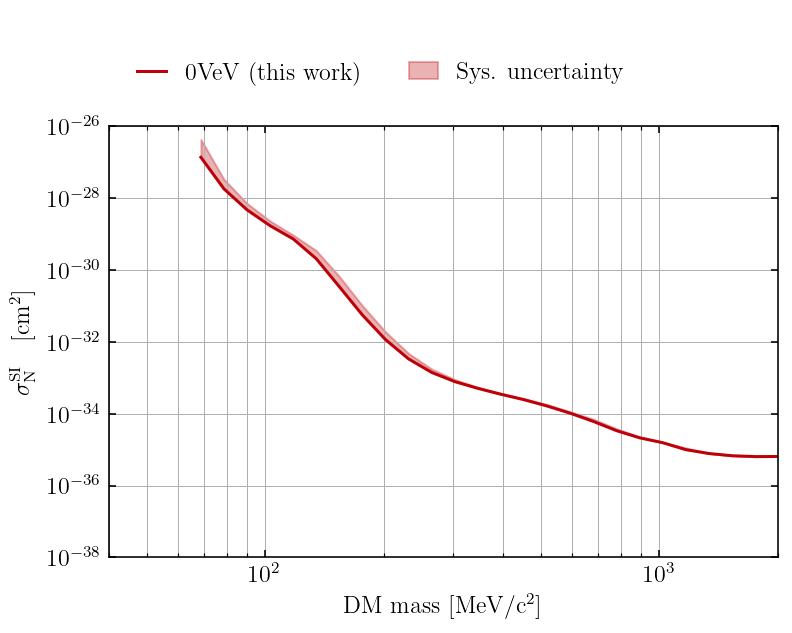

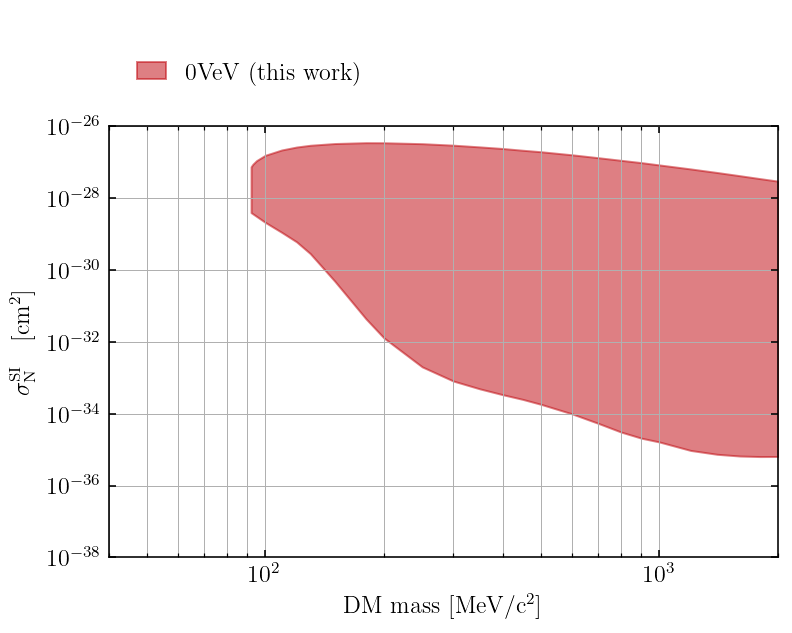

In [21]:
# no upper bounds
no_shielding_limit = np.loadtxt('./limit_data/no_shielding_limit.tsv', delimiter='\t')

color='#be0108'

fig = plt.figure(figsize=(6, 5.))
ax = []
ax.append(plt.subplot2grid((5, 1), (1, 0), rowspan=4))
ax.append(plt.subplot2grid((5, 1), (0, 0), colspan=1))

ax[0].loglog(no_shielding_limit[:,0], no_shielding_limit[:,1], lw=1.5, c=color, label='0VeV (this work)')
ax[0].fill_between(no_shielding_limit[:,0], no_shielding_limit[:,1], no_shielding_limit[:,2], color=color, alpha=0.3, label='Sys. uncertainty')
handles, leg_labels = ax[0].get_legend_handles_labels()
ax[0].set_xlabel(r'DM mass [MeV/${\rm c^2}$]', fontsize=12)
ax[0].set_ylabel(r'${\rm \sigma_{N}^{SI}\quad[cm^2]}$', fontsize=12)
ax[0].set_xlim(40, 2e3)
ax[0].set_ylim(1e-38, 1e-26)
ax[0].grid(True, which='both', lw=0.5)
ax[1].axis('off')
ax[1].legend(handles, leg_labels, ncol=2, columnspacing = 2., handlelength=1.2, bbox_to_anchor=(0.01, 0.01, 0.99, 0.99,), 
           prop={'size': 12}, loc='lower left', frameon=False, )

if save_plots:
    savefig(f"{plots_dir}/limit.pdf", bbox_inches="tight")
    
plt.show()


# right plot
limit = np.loadtxt('./limit_data/limit_with_upper_bound_from_shielding.tsv', delimiter='\t')

fig = plt.figure(figsize=(6, 5.))
ax = []
ax.append(plt.subplot2grid((5, 1), (1, 0), rowspan=4))
ax.append(plt.subplot2grid((5, 1), (0, 0), colspan=1))

ax[0].fill_between(limit[:,0], limit[:,1], limit[:,2], color=color, alpha=0.5, label='0VeV (this work)')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

handles, leg_labels = ax[0].get_legend_handles_labels()

ax[1].axis('off')
ax[1].legend(handles, leg_labels, ncol=1, columnspacing = 2., handlelength=1.2, bbox_to_anchor=(0.01, 0.01, 0.99, 0.99,), 
           prop={'size': 12}, loc='lower left', frameon=False, )

ax[0].set_ylabel(r'${\rm \sigma_{N}^{SI}\quad[cm^2]}$', fontsize=12)
ax[0].set_xlabel(r'DM mass [MeV/${\rm c^2}$]')
ax[0].set_xlim(40, 2e3)
ax[0].set_ylim(1e-38, 1e-26)
ax[0].grid(True, which='both', lw=0.5)

if save_plots:
    savefig(f"{plots_dir}/limit2.pdf", bbox_inches="tight")
    
plt.show()

# Fig. 14

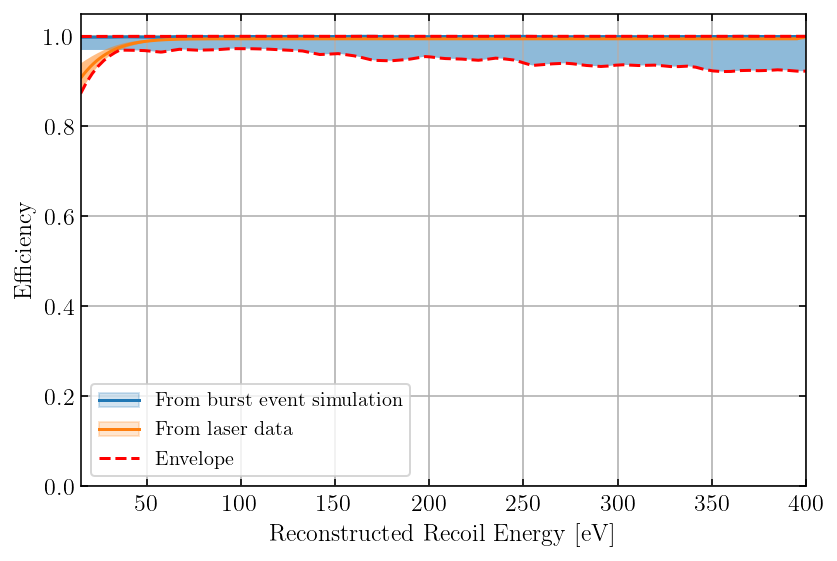

In [12]:
[energy, eff_laser, eff_laser_l, eff_laser_h, eff_burst, eff_burst_l, eff_burst_h, eff_combined, eff_combined_l, eff_combined_h] = np.loadtxt("data_files/fig14/burst_efficiency.txt",
          delimiter=",").T

figure(figsize=(6,4))

plot(energy,eff_burst,label="From burst event simulation")
fill_between(energy,eff_burst_l,eff_burst_h,alpha=0.5)

plot(energy,eff_laser,label="From laser data")
fill_between(energy,eff_laser_l,eff_laser_h,alpha=0.5)


plot(energy,eff_combined_l,color="r",linestyle="--")
plot(energy,eff_combined_h,color="r",linestyle="--",label="Envelope")
# errorbar(x,y,yerr=yerr,color="r",label="2-sigma fit uncertainty")

xlabel("Reconstructed Recoil Energy [eV]")
ylabel("Efficiency")
xlim(15,400)


handles, labels = gca().get_legend_handles_labels()
C0_patch = mpatches.Patch(color='C0', alpha=0.2)
C1_patch = mpatches.Patch(color='C1', alpha=0.2)
legend([(handles[0],C0_patch),(handles[1],C1_patch),handles[2]],[*labels])
grid()

tight_layout()
ylim(0.,1.05)

if save_plots:
    savefig(f"{plots_dir}/fig14.pdf", bbox_inches="tight")

# Fig. 15

In [14]:
fnames=['Nominals', 'Secondary pulses x2', 'Secondary pulses x0.5', 'No Secondary pulses']
res={}
for key in fnames:
    new_key = key.replace(" ", "_")
    res[key] = np.loadtxt(f"data_files/fig15/{new_key}.txt",delimiter=",")
    
xbincenters = np.loadtxt(f"data_files/fig15/xbincenters.txt") 
ybincenters = xbincenters

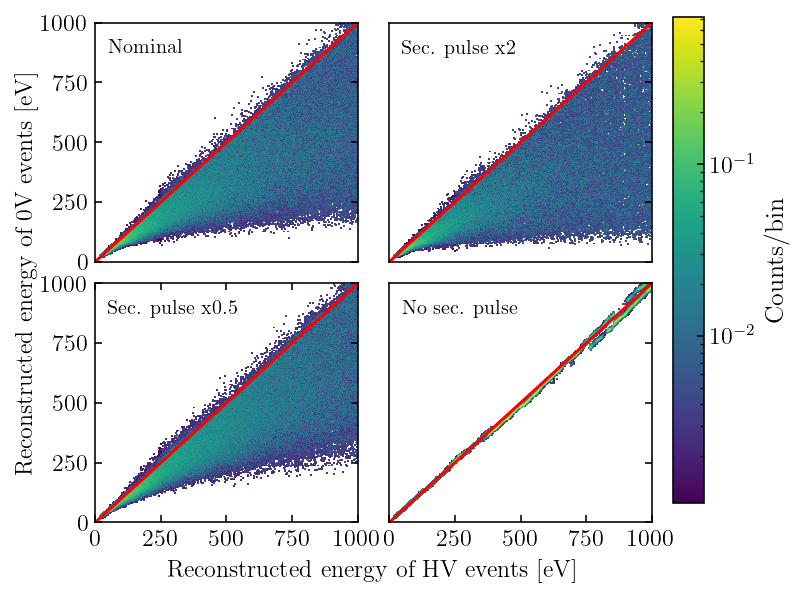

In [15]:
fig,ax=subplots(2,2,figsize=(6,4.5), sharex=True, sharey=True)
tk = ticker.LinearLocator(numticks=5)
fig_titles=['Nominal',
 'Sec. pulse x2',
 'Sec. pulse x0.5',
 'No sec. pulse']

ax0=fig.add_subplot(111, frameon=False)
# Turn off axis lines and ticks of the big subplot
ax0.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# ax0.set_xlabel(r"Reconstructed energy of HV events [eV$\mathrm{_r}$]")
ax0.set_xlabel(r"Reconstructed energy of HV events [eV]")
ax0.set_ylabel(r"Reconstructed energy of 0V events [eV]",labelpad=10)

    
k=1
for ii,key in enumerate(res):
    sca(ax[ii//2,ii%2])
    pcm=pcolormesh(xbincenters/k,ybincenters/k,np.transpose(res[key]),norm=LogNorm(),rasterized=True)    
    mono={'family' : 'monospace'}
    text(0.05,0.87,fig_titles[ii],transform=gca().transAxes,fontdict=mono)
    plot((0,1000/k),(0,1000/k),color="r")
    gca().xaxis.set_major_locator(tk)
    gca().yaxis.set_major_locator(tk)
    xlim(0,1000/k)
    ylim(0,1000/k)
    
nrows = 2
ncols = 2
axes=ax
for i in range(nrows):
    for j in range(ncols):
        # Remove the tick marks but leave the superleft and superbottom alone
        if i != nrows-1:
            if j != 0:
                axes[i][j].tick_params(axis='both', which='both', 
                           left=False, bottom=False, top=False)
            else:
                axes[i][j].tick_params(axis='both', which='both', bottom=False, top=False)
        else:
            if j != 0:
                axes[i][j].tick_params(axis='both', which='both', left=False, top=False)
    


# Tight layout is optional
fig.tight_layout()
fig.subplots_adjust(right=0.825,wspace=0.12, hspace=0.09)
cax = fig.add_axes([0.85, 0.2, 0.035, 0.75])
cbar = fig.colorbar(pcm, cax=cax)
cbar.set_label('Counts/bin', fontsize=13)

if save_plots:
    savefig(f"{plots_dir}/fig15.pdf", bbox_inches="tight")

# Fig. 16

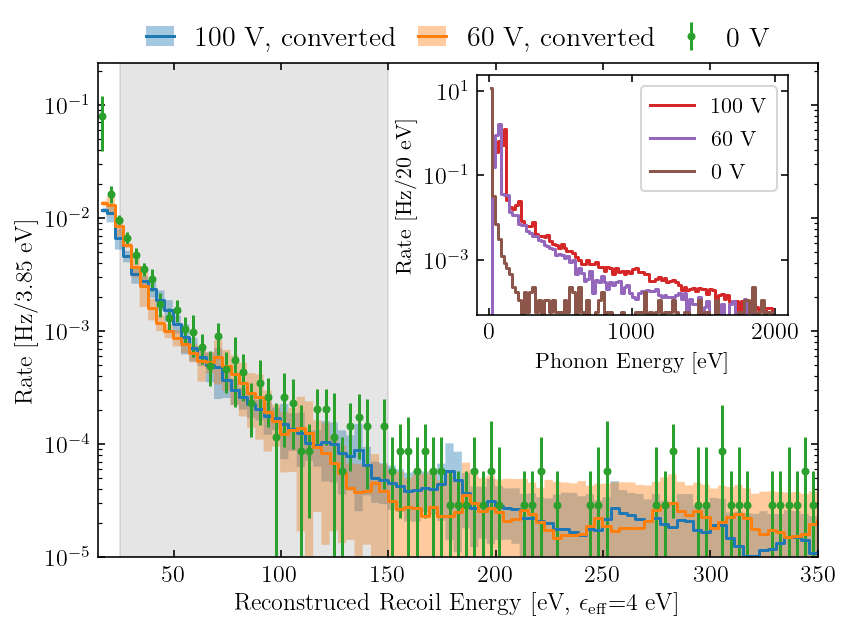

In [27]:
# load data
keys=['100 V', '60 V', '0 V']
plot_data_unscaled={}
plot_data={}
for key in keys:
    new_key = key.replace(" ", "_")
    plot_data_unscaled[key]=np.loadtxt(f"data_files/fig16/phonon_energy_{new_key}.txt",delimiter=",").T
    plot_data[key]=np.loadtxt(f"data_files/fig16/recoil_energy_{new_key}.txt",delimiter=",").T



###################################
# main figure
lables=["100 V", "60 V"]
figure(figsize=(6,4.5))
axvspan(25,150,color="grey",alpha=0.2)#,hatch="xx")


# binrange=[np.argmax(xcenters>25),np.argmax(xcenters>150)]
for idata,key in enumerate(lables):
    xcenters=plot_data[key][0]
    ycenter=plot_data[key][1]
    yerr=plot_data[key][2]
    p0=step(xcenters,ycenter,color=f"C{idata}",label="center",where="mid")
    p1=fill_between(xcenters,ycenter-yerr,ycenter+yerr,step="mid",label=lables[idata]+", converted",color=f"C{idata}",alpha=0.4,linewidth=0)
    

key="0 V"
xcenters=plot_data[key][0]
ycenter=plot_data[key][1]
yerr=plot_data[key][2]
errorbar(xcenters,ycenter,yerr=yerr,label="0 V",fmt="o",color="C2",markersize=3)    

yscale("log")
ylim(bottom=1e-5) 
xlim(15,350)  
xlabel(r"Reconstruced Recoil Energy [$\mathrm{eV}$"+r", $\epsilon_{\mathrm{eff}}$"+f"=4 eV]")
ylabel("Rate [Hz/3.85 eV]")

handles, labels = gca().get_legend_handles_labels()
ncol=3; columnspacing = 0.5; bbox_to_anchor=(0.05, 1, 0.9, 0.95)
legend([(handles[0],handles[2]),(handles[1],handles[3]),handles[4]],[labels[2],labels[3],labels[4]],\
       ncol=ncol, columnspacing = columnspacing,handlelength=1.,bbox_to_anchor=bbox_to_anchor,
        mode="expand", borderaxespad=0.,prop={'size': 14}, loc='lower left', frameon=False)       
tight_layout()

###################################
# inset plot

left, bottom, width, height = [0.56, 0.5, 0.36, 0.37]
ax2 = gcf().add_axes([left, bottom, width, height])
sca(ax2)

labels=["100 V", "60 V", "0 V"]
ROI = [15,400]
for idata,key in enumerate(labels):
    xcenters=plot_data_unscaled[key][1]
    ycenter=plot_data_unscaled[key][0]
    step(xcenters,ycenter,where="mid",label=key, color=f"C{idata+3}")
yscale("log")
ylim(bottom=5e-5)
legend(fontsize=11)
xlabel("Phonon Energy [eV]",fontsize=11)
ylabel("Rate [Hz/20 eV]",fontsize=11)

if save_plots:
    savefig(f"{plots_dir}/fig16.pdf", bbox_inches="tight")